This code performs the following steps:<br>

<li>Import the necessary libraries.</li>
<li>Load the dataset into a pandas dataframe.</li>
<li>Define a function to clean the text by removing unnecessary characters and numbers.</li>
<li>Clean the text in the dataframe using the clean_text function.</li>
<li>Tokenize the text into individual words using the nltk word_tokenize function.</li>
<li>Remove stop words from the tokenized text.</li>
<li>Perform sentiment analysis using the VADER algorithm and assign a sentiment score to each tweet.</li>
<li>Split the data into training and testing sets using the sklearn train_test_split function.</li>

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

# Define a function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    text = text.strip()
    return text

# Load dataset into a pandas dataframe
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [33]:
# Clean the text in the dataframe
df = df.dropna(subset=['clean_text'])
df['clean_text'] = df['clean_text'].apply(clean_text)

In [34]:
# Tokenize the text
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)
df.head()

,clean_text,category,tokens
0,when modi promised minimum government maximum ...,-1.0,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu..."


In [35]:
# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,clean_text,category,tokens
0,when modi promised minimum government maximum ...,-1.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today..."


In [36]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer class
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yuvansh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
df.head()

,clean_text,category,tokens,sentiment
0,when modi promised minimum government maximum ...,-1.0,"[modi, promised, minimum, government, maximum,...",0.5267
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]",-0.4019
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m...",0.7096
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,...",-0.0713
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today...",0.4754


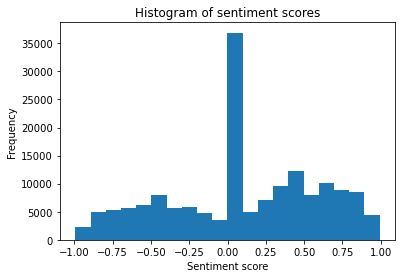

In [41]:
import matplotlib.pyplot as plt

# Plot a histogram of the sentiment scores
plt.hist(df['sentiment'], bins=20)
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.title('Histogram of sentiment scores')
plt.show()

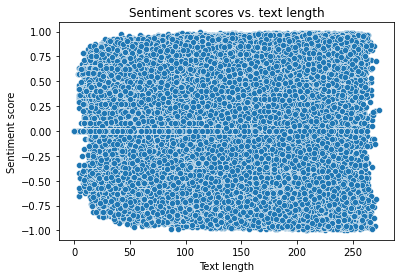

In [42]:
import seaborn as sns

# Create a scatter plot of sentiment scores against text length
sns.scatterplot(x=df['clean_text'].apply(len), y=df['sentiment'])
plt.xlabel('Text length')
plt.ylabel('Sentiment score')
plt.title('Sentiment scores vs. text length')
plt.show()

In [38]:
# Convert sentiment values to categorical labels
df['sentiment_label'] = pd.cut(df['sentiment'], bins=[-np.inf, -0.05, 0.05, np.inf], labels=['negative', 'neutral', 'positive'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment_label'], test_size=0.2, random_state=0)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create a CountVectorizer object
cv = CountVectorizer()

# Fit the CountVectorizer object to the training data and transform the training data
X_train_bow = cv.fit_transform(X_train)

# Transform the testing data using the fitted CountVectorizer object
X_test_bow = cv.transform(X_test)

# Create a Naive Bayes classifier object
nb = MultinomialNB()

# Train the classifier on the vectorized training data and labels
nb.fit(X_train_bow, y_train)

# Use the trained classifier to predict the sentiment of the vectorized testing data
y_pred = nb.predict(X_test_bow)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


<AxesSubplot:>

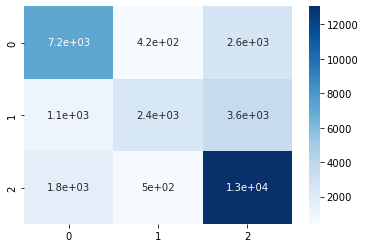

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

<font color = "green">The accuracy score of 0.69 indicates that the Naive Bayes classifier model is able to correctly predict the sentiment of approximately 69% of the tweets in the testing dataset. This suggests that the model is moderately effective at classifying the sentiment of tweets. However, further analysis could be performed to investigate areas for improvement and determine if other models or approaches might provide better results.</font>